In [1]:
from GG_mthesis import *
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

In [24]:
df = pd.read_csv('data/02_intermediate/JR18002/JR18002_1', index_col=0, parse_dates=['time'])


In [40]:
df

,rho,lon,lat,time,bx
0.0,NaN,NaN,NaN,2018-10-28 04:00:00.000416,NaN
500.0,1026.871319,-57.933880,-55.624108,2018-10-28 04:01:38.882844,NaN
1000.0,1026.870918,-57.929788,-55.627965,2018-10-28 04:03:16.622191,3.842486e-09
1500.0,1026.871462,-57.925600,-55.631790,2018-10-28 04:04:55.164636,-5.203050e-09
2000.0,1026.872522,-57.921338,-55.635589,2018-10-28 04:06:39.267411,-1.014841e-08
...,...,...,...,...,...
494000.0,1027.244961,-55.484516,-59.579398,2018-10-31 00:52:03.960046,1.338137e-08
494500.0,1027.248087,-55.481787,-59.583677,2018-10-31 00:53:40.339095,-2.992066e-08
495000.0,1027.247012,-55.479116,-59.587965,2018-10-31 00:55:14.898283,1.028989e-08
495500.0,1027.248452,-55.476409,-59.592248,2018-10-31 00:56:48.749192,-1.378232e-08


In [41]:
df_lat = downsample_lat(df, -0.005)
df_lat

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


,rho,bx,lon,lat,time
-55.000,NaN,NaN,NaN,-55.000,NaT
-55.005,NaN,NaN,NaN,-55.005,NaT
-55.010,NaN,NaN,NaN,-55.010,NaT
-55.015,NaN,NaN,NaN,-55.015,NaT
-55.020,NaN,NaN,NaN,-55.020,NaT
...,...,...,...,...,...
-60.480,NaN,NaN,NaN,-60.480,NaT
-60.485,NaN,NaN,NaN,-60.485,NaT
-60.490,NaN,NaN,NaN,-60.490,NaT
-60.495,NaN,NaN,NaN,-60.495,NaT


C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


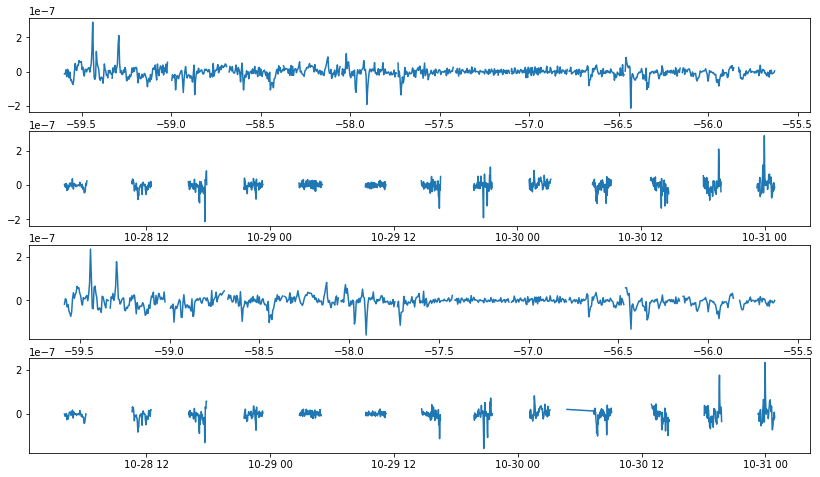

In [46]:
#from GG_mthesis.d01_data.processing import truncate, grid_limits, downsample_lat
df_lat = downsample_lat(df, -0.005)
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4,figsize=(14,8))
ax0.plot(df['lat'], df['bx'])
ax1.plot(df['time'], df['bx'])
ax2.plot(df_lat['lat'], df_lat['bx'])
ax3.plot(df_lat['time'], df_lat['bx'])

In [8]:
df_lat['bx'].median()

-2.643208602821408e-09

In [8]:
#Start year and end year
START_YEAR  = 2017
END_YEAR    = 2019 #NOT INCLUDED
NUMBER_YEAR = 2


years = range(START_YEAR, END_YEAR)
months = ['%.2d' % i for i in range(1,13)]
number_years = range(NUMBER_YEAR)

#Input paths of the files
base_adt_path = 'data/01_raw/AVISO/SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_008_047/dataset-duacs-rep-global-merged-allsat-phy-l4' #
#adt_file_name_base = 'dt_global_twosat_phy_l4_'


#Main file reading algorithm. Multifile reader of xarray which concanates the read files (loading through dask). Additional loop and concanating of each month and years (THIS IS JUST FOR THE FIRST YEAR, CHANGE INDEX OF YEARS (MAY HAVE TO LOOP THROUGH))
ds_adt = xr.concat([xr.concat([[xr.open_mfdataset(base_adt_path + '/' + str(i_year) + '/' + i_month + '/' + '*.nc', parallel = True) for i_month in months] for i_year in years][n_year], dim='time') for n_year in number_years], dim='time')

#Center longitude format to Atlantic.
ds_adt = ds_adt.assign_coords(longitude=(((ds_adt.longitude + 180) % 360)-180)).sortby('longitude')
ds_adt.longitude.attrs = {
    'long_name': 'Longitude',
    'standard_name': 'longitude',
    'units': 'degrees_east',
    'bounds': 'lon_bnds',
    'axis': 'X',
    'valid_max': 179.9375,
    'valid_min': -179.9375,
    '_CoordinateAxisType': 'Lon'}

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
C:\Users\gia

In [9]:
ds_adt

<xarray.Dataset>
Dimensions:    (time: 730, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2018-12-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2017-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2017-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...